# 2019 봄학기 인공지능 기말과제

### 생명과학대학 환경생태공학부 2015140521 김나연

Mushroom Dataset - Categorical Dataset 분석

In [1]:
import pandas as pd
mushroom_path = './mushroom.csv'
mushroom = pd.read_csv(mushroom_path)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-adove-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
mushroom.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-adove-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [3]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-adove-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-adove-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
#encoding
mushroom = pd.get_dummies(mushroom, columns=mushroom.columns[1:])
mushroom.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#kfold cross validation을 위한 구분
m_test = mushroom.sample(frac = 0.2)
m_train = mushroom.drop(index = m_test.index)

m_test_x = m_test.drop(columns='class')
m_test_y = m_test['class']
m_train_x = m_train.drop(columns='class')
m_train_y = m_train['class']

from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit
kfold = KFold(n_splits = 5, shuffle = True)

Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [8]:
decision = DecisionTreeClassifier('entropy', max_depth = 5, min_samples_split = 3)

results = cross_val_score(decision, m_train_x, m_train_y, cv=kfold)
print(results)
results.mean()

[0.99846154 0.99923077 1.         1.         1.        ]


0.9995384615384616

In [9]:
decision2 = DecisionTreeClassifier('entropy', max_depth = 4, min_samples_split = 3)

results = cross_val_score(decision2, m_train_x, m_train_y, cv=kfold)
print(results)
results.mean()

[1.         1.         1.         0.99769231 0.99769053]


0.9990765677740274

In [10]:
decision3 = DecisionTreeClassifier('entropy', max_depth = 3, min_samples_split = 3)

results = cross_val_score(decision3, m_train_x, m_train_y, cv=kfold)
print(results)
results.mean()

[0.95769231 0.96769231 0.96384615 0.96923077 0.97459584]


0.9666114762835317

In [11]:
decision4 = DecisionTreeClassifier('entropy', max_depth = 2, min_samples_split = 3)

results = cross_val_score(decision4, m_train_x, m_train_y, cv=kfold)
print(results)
results.mean()

[0.93461538 0.93307692 0.91692308 0.91769231 0.93533487]


0.9275285130573814

In [12]:
#decision tree final result
decision2.fit(m_train_x, m_train_y)
decision2.score(m_test_x,m_test_y)

0.9993846153846154

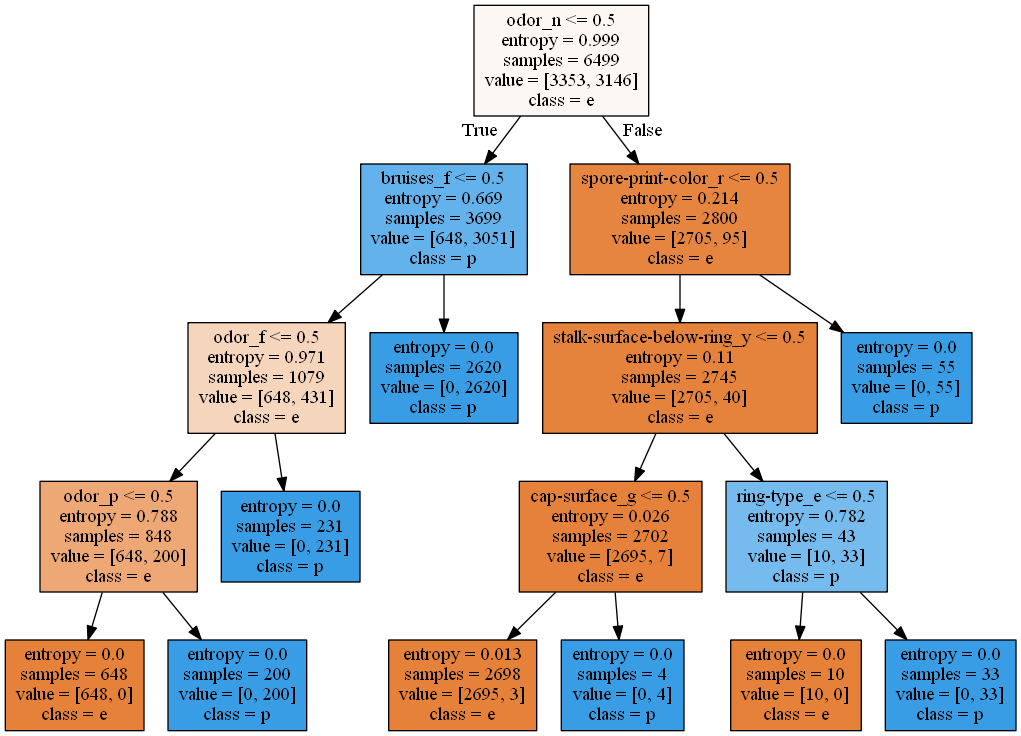

In [13]:
#graphviz 오류때문에 path를 따로 설정해주었습니다!
import pydotplus
import sklearn.tree as tree
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz

dt_feature_names = list(m_test_x.columns)
dt_target_names = [str(s) for s in m_test_y.unique()]
tree.export_graphviz(decision2, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
lr = LogisticRegression()
lr.fit(m_train_x, m_train_y)
print("lr 학습률 : ", lr.score(m_test_x,m_test_y))
results = cross_val_score(lr, m_train_x, m_train_y, cv=kfold)
print("lr cv : ", results)
print("lr cv mean : ",results.mean())
lr.coef_

c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr 학습률 :  1.0


c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr cv :  [1.         0.99923077 0.99923077 1.         1.        ]
lr cv mean :  0.9996923076923077


c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 2.55185492e-01,  5.36760281e-01, -7.13191470e-03,
         2.30291150e-02, -5.54218783e-01, -9.49101109e-02,
        -7.04316802e-01,  8.53772336e-01,  1.12458861e-01,
        -1.03200316e-01,  9.62939634e-01, -7.31197499e-01,
        -2.51373334e-02,  1.39134056e-01, -3.81821626e-01,
         9.53259907e-01, -4.72496063e-01, -4.38340964e-01,
         4.88946087e-01, -3.36572119e-01, -3.78876686e-01,
         5.37590766e-01, -3.31871515e+00,  3.48404707e+00,
         3.44869743e+00, -3.35518920e+00,  3.53004013e-01,
        -3.96285581e+00,  2.01080362e+00,  7.42726663e-01,
         7.56195451e-01, -2.11719475e-01,  3.70433555e-01,
         1.10983883e+00, -9.51124750e-01, -2.08822448e+00,
         2.24693856e+00,  1.54355763e+00, -5.57241954e-01,
         8.06132776e-02,  1.52451681e-01, -5.00343942e-01,
        -5.87694699e-01, -1.51659954e-01, -3.45154515e-01,
         7.30505719e-01, -1.61703140e-01, -1.62680410e-01,
         1.18064390e-01,  4.67518090e-01, -3.08804010e-0

In [15]:
rank = pd.DataFrame(lr.coef_, index = ['value'], columns=m_train_x.columns)
rank.sort_values('value', axis = 1, ascending = False).T.head()

,value
spore-print-color_r,4.231401
odor_c,3.484047
odor_f,3.448697
gill-size_n,2.246939
odor_p,2.010804


In [16]:
rank.sort_values('value', axis = 1, ascending = True).T.head()

,value
odor_n,-3.962856
odor_l,-3.355189
odor_a,-3.318715
gill-size_b,-2.088224
ring-type_f,-2.060633


In [17]:
lr.score(m_test_x,m_test_y)

1.0

MLP

In [18]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier((20,), activation = 'logistic')
mlp.fit(m_train_x, m_train_y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
mlp.score(m_train_x,m_train_y)

1.0

In [20]:
mlp.score(m_test_x,m_test_y)

1.0

In [21]:
results = cross_val_score(mlp, m_train_x, m_train_y, cv=kfold)
print(results)
results.mean()

[1.         1.         0.99923077 0.99923077 1.        ]


0.9996923076923077

Wine Quality Dataset - Numeric Dataset 분석

In [22]:
wine_path = './winequalityN.csv'
wine = pd.read_csv(wine_path)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [24]:
#from sklearn.preprocessing import LabelEncoder
#wine_enc = LabelEncoder()
#column = wine_x.columns[0]
#wine_x[column] = wine_enc.fit(wine_x[column]).transform(wine_x[column])

In [25]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
for column in wine.columns[1:] :
    wine[[column]] = imputer.fit_transform(wine[[column]])

In [27]:
wine = pd.get_dummies(wine, prefix=['type'], columns=['type'])

In [28]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,0.246114,0.753886
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [29]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0,1


In [30]:
#trainset validationset testset 구분 - cross validation
w_test = wine.sample(frac = 0.2)
w_train = wine.drop(index = w_test.index)

w_test_x = w_test.drop(columns='quality')
w_test_y = w_test['quality']
w_train_x = w_train.drop(columns='quality')
w_train_y = w_train['quality']

Desicion Tree

In [31]:
d_wine = DecisionTreeClassifier('entropy', max_depth = 5, min_samples_split = 3)
d_wine.fit(w_train_x,w_train_y)
d_wine.score(w_train_x,w_train_y)

0.5636783378222393

In [32]:
d_wine2 = DecisionTreeClassifier('entropy', max_depth = 8, min_samples_split = 3)
d_wine2.fit(w_train_x,w_train_y)
d_wine2.score(w_train_x,w_train_y)

0.6540977298961139

In [33]:
d_wine3 = DecisionTreeClassifier('entropy', max_depth = 15, min_samples_split = 3)
d_wine3.fit(w_train_x,w_train_y)
d_wine3.score(w_train_x,w_train_y)

0.9549826856483262

In [34]:
d_wine4 = DecisionTreeClassifier('entropy', max_depth = 3, min_samples_split = 3)
d_wine4.fit(w_train_x,w_train_y)
d_wine4.score(w_train_x,w_train_y)

0.5303963062716429

In [35]:
results = cross_val_score(d_wine3,w_train_x,w_train_y, cv=kfold)
print(results)
results.mean()

[0.56826923 0.56923077 0.57211538 0.56977863 0.55052936]


0.5659846746131635

In [36]:
results = cross_val_score(d_wine,w_train_x,w_train_y, cv=kfold)
print(results)
results.mean()

[0.54807692 0.52307692 0.52884615 0.55630414 0.58614052]


0.5484889316650625

In [37]:
results = cross_val_score(d_wine2,w_train_x,w_train_y, cv=kfold)
print(results)
results.mean()

[0.53461538 0.53173077 0.53557692 0.56207892 0.54475457]


0.5417513141334124

In [38]:
results = cross_val_score(d_wine3,w_train_x,w_train_y, cv=kfold)
print(results)
results.mean()

[0.56442308 0.56346154 0.53557692 0.55919153 0.54956689]


0.554443992004146

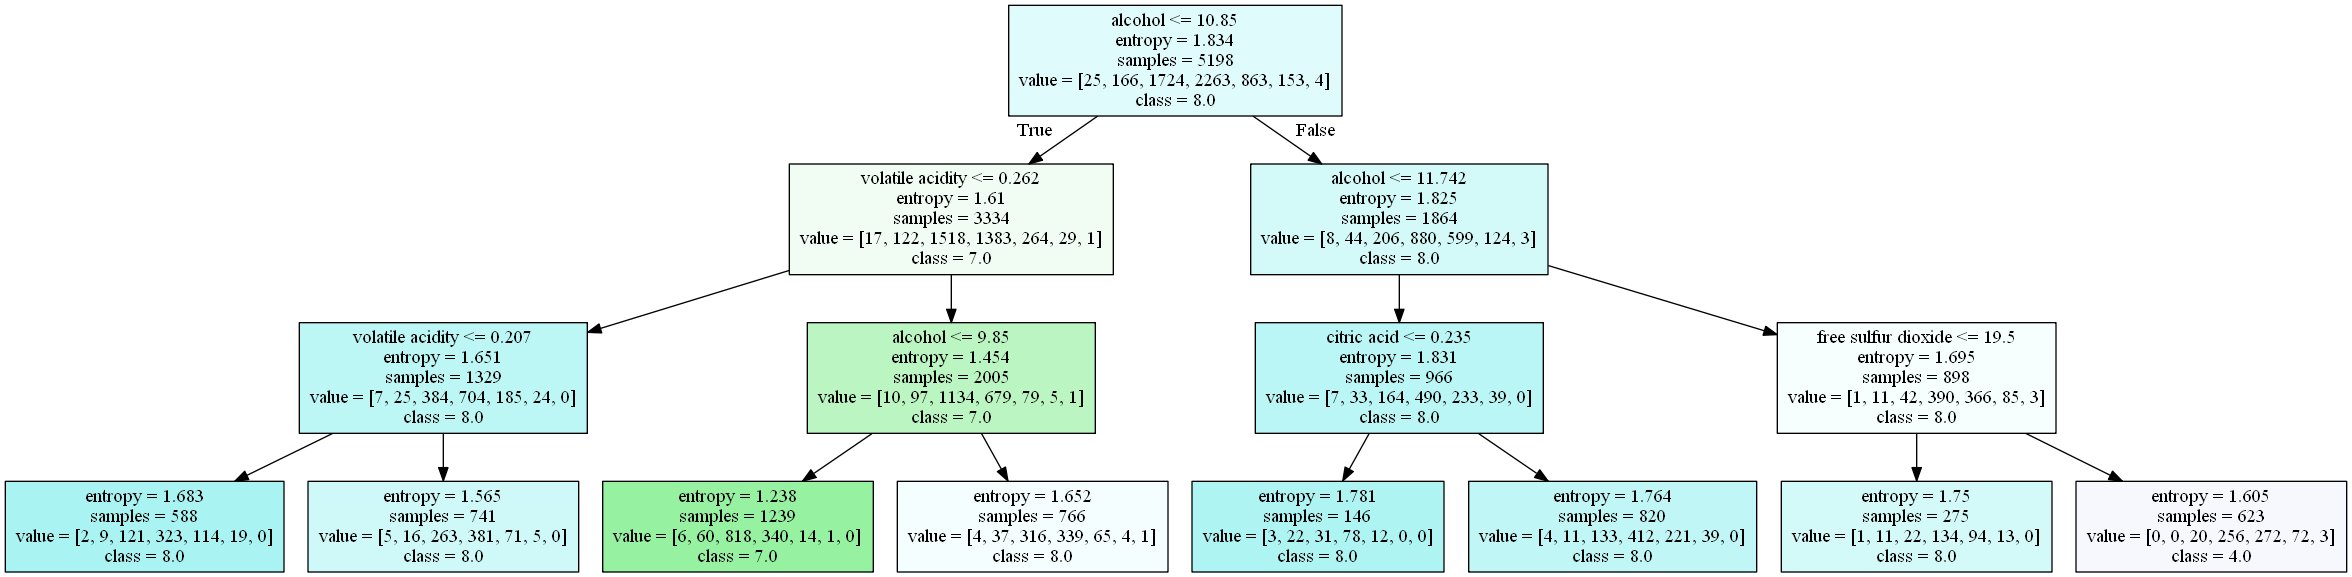

In [39]:
dt_feature_names = list(w_train_x.columns)
dt_target_names = [str(s) for s in w_train_y.unique()]
tree.export_graphviz(d_wine4, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [40]:
d_wine.score(w_test_x,w_test_y)

0.5134719014626636

Logistic Regression

In [41]:
lr_wine = LogisticRegression()
lr_wine.fit(w_train_x,w_train_y)
lr_wine.score(w_train_x,w_train_y)

c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5423239707579839

In [42]:
lr_wine.coef_

array([[ 3.30565852e-01,  2.39499206e+00, -6.25696025e-01,
        -9.47464268e-02,  3.70049908e-01,  2.64157595e-02,
        -3.23644504e-03, -5.40423777e-01, -2.22889191e-01,
        -6.86278533e-01, -6.11288611e-01, -6.86371211e-01,
         1.39354085e-01],
       [ 6.98807973e-02,  3.80635859e+00, -2.53111753e-01,
        -6.39816138e-02,  1.59470077e-01, -4.95189033e-02,
        -2.55102377e-03, -2.36383404e-01,  4.66342500e-01,
        -2.81782304e-01, -4.60791439e-01, -1.31995236e+00,
         1.05801470e+00],
       [-1.47437083e-02,  2.76991038e+00,  4.92924081e-01,
        -4.68084042e-02,  7.98400789e-01, -1.25373834e-02,
         8.12156406e-03,  2.99580194e+00,  5.93267665e-02,
        -1.47319052e+00, -8.63652123e-01,  1.73197654e+00,
         1.28111963e+00],
       [-1.63268079e-02, -2.56590651e+00, -4.03449974e-01,
         2.43291887e-02,  2.18354230e-01,  4.24652520e-03,
        -2.50416909e-03, -2.98561803e-01,  9.05372275e-02,
         3.11505639e-01,  1.23940495e

In [43]:
results = cross_val_score(lr_wine,w_train_x,w_train_y, cv=kfold)
print(results)
results.mean()

c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this 

[0.53269231 0.53846154 0.54326923 0.55149182 0.53512993]


0.5402089657214777

In [44]:
for i in range(0,7) :
    print(pd.DataFrame([lr_wine.coef_[i]], index = ['value'], columns=w_train_x.columns).sort_values('value', axis = 1, ascending = False).T.head())
print("---------------------------")
for i in range(0,7) :
    print(pd.DataFrame([lr_wine.coef_[i]], index = ['value'], columns=w_train_x.columns).sort_values('value', axis = 1, ascending = True).T.head())

                        value
volatile acidity     2.394992
chlorides            0.370050
fixed acidity        0.330566
type_white           0.139354
free sulfur dioxide  0.026416
                     value
volatile acidity  3.806359
type_white        1.058015
pH                0.466342
chlorides         0.159470
fixed acidity     0.069881
                     value
density           2.995802
volatile acidity  2.769910
type_red          1.731977
type_white        1.281120
chlorides         0.798401
                   value
sulphates       0.311506
chlorides       0.218354
alcohol         0.123940
pH              0.090537
residual sugar  0.024329
                        value
sulphates            1.567968
alcohol              0.741160
fixed acidity        0.052443
residual sugar       0.034856
free sulfur dioxide  0.009766
                        value
alcohol              0.732185
citric acid          0.410063
sulphates            0.179138
residual sugar       0.049842
free sulfur diox

In [45]:
lr_wine.classes_

array([3., 4., 5., 6., 7., 8., 9.])

In [46]:
lr_wine.score(w_test_x,w_test_y)

0.5219399538106235

MLP

In [47]:
mlp_wine = MLPClassifier((200,), activation='logistic')
mlp_wine.fit(w_train_x,w_train_y)
mlp_wine.score(w_train_x,w_train_y)

0.556367833782224

In [48]:
mlp_wine2 = MLPClassifier((50,), activation='logistic')
mlp_wine2.fit(w_train_x,w_train_y)
mlp_wine2.score(w_train_x,w_train_y)

c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5590611773759138

In [49]:
results = cross_val_score(mlp_wine,w_train_x,w_train_y, cv=kfold)
print(results)
results.mean()

[0.52596154 0.52884615 0.55288462 0.52550529 0.54571704]


c:\users\nayeon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5357829273709929

In [50]:
mlp_wine.score(w_test_x, w_test_y)

0.5327174749807544